In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from datetime import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
ham_data = pd.read_excel("talep_tahmin_data.xlsx")

# 1.Data Preparation

In [2]:
df_ham = ham_data.copy()

In [3]:
df_ham.head(5)

TARIH  URUN_ID  URUN_GRUBU  SATIS_ADET  STOK_DISI_SURE
0 2017-01-01  SKU0016           8      2784.0             NaN
1 2017-01-02  SKU0016           8     10484.0             NaN
2 2017-01-03  SKU0016           8      8934.0             NaN
3 2017-01-04  SKU0016           8     10185.0             NaN
4 2017-01-05  SKU0016           8     13850.0             NaN

In [4]:
df_ham = df_ham[["TARIH","SATIS_ADET","STOK_DISI_SURE"]]

In [5]:
df_ham.head()

TARIH  SATIS_ADET  STOK_DISI_SURE
0 2017-01-01      2784.0             NaN
1 2017-01-02     10484.0             NaN
2 2017-01-03      8934.0             NaN
3 2017-01-04     10185.0             NaN
4 2017-01-05     13850.0             NaN

In [6]:
df_ham = df_ham.set_index('TARIH')

## We dont have some date rows in our data, asfreq functions handles it. Fills the missing dates with values nan.

In [7]:
df_ham = df_ham.asfreq('d')

In [8]:
df_ham["weekDay"] = df_ham.index.dayofweek
df_ham["month"] = df_ham.index.month
df_ham["year"] = df_ham.index.year

In [9]:
df_ham.head()

SATIS_ADET  STOK_DISI_SURE  weekDay  month  year
TARIH                                                       
2017-01-01      2784.0             NaN        6      1  2017
2017-01-02     10484.0             NaN        0      1  2017
2017-01-03      8934.0             NaN        1      1  2017
2017-01-04     10185.0             NaN        2      1  2017
2017-01-05     13850.0             NaN        3      1  2017

In [10]:
df_ham.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2017-01-01 to 2019-11-30
Freq: D
Data columns (total 5 columns):
SATIS_ADET        1031 non-null float64
STOK_DISI_SURE    76 non-null float64
weekDay           1064 non-null int64
month             1064 non-null int64
year              1064 non-null int64
dtypes: float64(2), int64(3)
memory usage: 49.9 KB


In [11]:
df_ham.tail(37)

SATIS_ADET  STOK_DISI_SURE  weekDay  month  year
TARIH                                                       
2019-10-25         NaN             NaN        4     10  2019
2019-10-26         NaN             NaN        5     10  2019
2019-10-27      2835.0             NaN        6     10  2019
2019-10-28     17582.0             NaN        0     10  2019
2019-10-29      5546.0             NaN        1     10  2019
2019-10-30      9825.0             NaN        2     10  2019
2019-10-31      6160.0             NaN        3     10  2019
2019-11-01     17808.0             NaN        4     11  2019
2019-11-02     13055.0             NaN        5     11  2019
2019-11-03      5753.0             NaN        6     11  2019
2019-11-04     28358.0             NaN        0     11  2019
2019-11-05     22060.0             NaN        1     11  2019
2019-11-06     11687.0             NaN        2     11  2019
2019-11-07      9627.0             NaN        3     11  2019
2019-11-08      9797.0             NaN        4     11  2019
2019-11-09         NaN             NaN        5     11  2019
2019-11-10      2199.0             NaN        6     11  2019
2019-11-11     13260.0             NaN        0     11  2019
2019-11-12      9189.0             NaN        1     11  2019
2019-11-13      6338.0             NaN        2     11  2019
2019-11-14     17937.0             NaN        3     11  2019
2019-11-15     23024.0             NaN        4     11  2019
2019-11-16     12760.0             NaN        5     11  2019
2019-11-17      4454.0             NaN        6     11  2019
2019-11-18     37130.0             2.0        0     11  2019
2019-11-19     21029.0             NaN        1     11  2019
2019-11-20     17771.0             NaN        2     11  2019
2019-11-21     18388.0             NaN        3     11  2019
2019-11-22     22426.0             NaN        4     11  2019
2019-11-23     11542.0             NaN        5     11  2019
2019-11-24      3128.0             NaN        6     11  2019
2019-11-25     31971.0             NaN        0     11  2019
2019-11-26     24786.0             NaN        1     11  2019
2019-11-27     17789.0             NaN        2     11  2019
2019-11-28      9965.0             NaN        3     11  2019
2019-11-29     11018.0             NaN        4     11  2019
2019-11-30      6351.0             NaN        5     11  2019

### We have nan values for some dates.

In [12]:
fig = px.line(df_ham, x=df_ham.index, y='SATIS_ADET', title='SATIS GELISIM')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [13]:
df_ham.reset_index()
df_ham.head()

SATIS_ADET  STOK_DISI_SURE  weekDay  month  year
TARIH                                                       
2017-01-01      2784.0             NaN        6      1  2017
2017-01-02     10484.0             NaN        0      1  2017
2017-01-03      8934.0             NaN        1      1  2017
2017-01-04     10185.0             NaN        2      1  2017
2017-01-05     13850.0             NaN        3      1  2017

## We want to fill nan values with mean values of same weekdays values.
## We use rolling mean of 28 days after groupby with weekday column.
## With this method we use last 4 values of same weekday to fill the nan value.

In [14]:
df = df_ham.join(df_ham.reset_index().set_index('TARIH').groupby('weekDay').rolling('28d').mean(), rsuffix='_avg')

In [15]:
df.head()

SATIS_ADET  STOK_DISI_SURE  weekDay  month  year  \
weekDay TARIH                                                          
0       2017-01-02     10484.0             NaN        0      1  2017   
        2017-01-09     13833.0             NaN        0      1  2017   
        2017-01-16     17700.0             9.0        0      1  2017   
        2017-01-23     19167.0            61.0        0      1  2017   
        2017-01-30     11793.0             NaN        0      1  2017   

                    SATIS_ADET_avg  STOK_DISI_SURE_avg  weekDay_avg  \
weekDay TARIH                                                         
0       2017-01-02    10484.000000                 NaN          0.0   
        2017-01-09    12158.500000                 NaN          0.0   
        2017-01-16    14005.666667                 9.0          0.0   
        2017-01-23    15296.000000                35.0          0.0   
        2017-01-30    15623.250000                35.0          0.0   

                    month_avg  year_avg  
weekDay TARIH                            
0       2017-01-02        1.0    2017.0  
        2017-01-09        1.0    2017.0  
        2017-01-16        1.0    2017.0  
        2017-01-23        1.0    2017.0  
        2017-01-30        1.0    2017.0

In [16]:
df.drop(["weekDay",'weekDay_avg',"STOK_DISI_SURE_avg","month_avg","year_avg"], axis=1, inplace=True)
df.reset_index(inplace=True)
df.set_index('TARIH', inplace=True)
df.sort_index(inplace=True)
df = df.asfreq('d')
df.tail(38)

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year  SATIS_ADET_avg
TARIH                                                                       
2019-10-24        3     13224.0             NaN     10  2019    13995.250000
2019-10-25        4         NaN             NaN     10  2019    13254.000000
2019-10-26        5         NaN             NaN     10  2019    14807.000000
2019-10-27        6      2835.0             NaN     10  2019     2252.333333
2019-10-28        0     17582.0             NaN     10  2019    16786.500000
2019-10-29        1      5546.0             NaN     10  2019    12596.750000
2019-10-30        2      9825.0             NaN     10  2019     9767.250000
2019-10-31        3      6160.0             NaN     10  2019    12494.000000
2019-11-01        4     17808.0             NaN     11  2019    14048.333333
2019-11-02        5     13055.0             NaN     11  2019    13055.000000
2019-11-03        6      5753.0             NaN     11  2019     4034.666667
2019-11-04        0     28358.0             NaN     11  2019    20609.500000
2019-11-05        1     22060.0             NaN     11  2019    16029.000000
2019-11-06        2     11687.0             NaN     11  2019     9372.000000
2019-11-07        3      9627.0             NaN     11  2019    11960.250000
2019-11-08        4      9797.0             NaN     11  2019    13063.000000
2019-11-09        5         NaN             NaN     11  2019    13055.000000
2019-11-10        6      2199.0             NaN     11  2019     3575.750000
2019-11-11        0     13260.0             NaN     11  2019    23840.500000
2019-11-12        1      9189.0             NaN     11  2019    14783.250000
2019-11-13        2      6338.0             NaN     11  2019    10023.500000
2019-11-14        3     17937.0             NaN     11  2019    11737.000000
2019-11-15        4     23024.0             NaN     11  2019    16876.333333
2019-11-16        5     12760.0             NaN     11  2019    12907.500000
2019-11-17        6      4454.0             NaN     11  2019     3810.250000
2019-11-18        0     37130.0             2.0     11  2019    24082.500000
2019-11-19        1     21029.0             NaN     11  2019    14456.000000
2019-11-20        2     17771.0             NaN     11  2019    11405.250000
2019-11-21        3     18388.0             NaN     11  2019    13028.000000
2019-11-22        4     22426.0             NaN     11  2019    18263.750000
2019-11-23        5     11542.0             NaN     11  2019    12452.333333
2019-11-24        6      3128.0             NaN     11  2019     3883.500000
2019-11-25        0     31971.0             NaN     11  2019    27679.750000
2019-11-26        1     24786.0             NaN     11  2019    19266.000000
2019-11-27        2     17789.0             NaN     11  2019    13396.250000
2019-11-28        3      9965.0             NaN     11  2019    13979.250000
2019-11-29        4     11018.0             NaN     11  2019    16566.250000
2019-11-30        5      6351.0             NaN     11  2019    10217.666667

## We replace those nan values with satıs_adet_avg that we calculated. 

In [17]:
df['SATIS_ADET'] = df.apply(lambda x: x['SATIS_ADET_avg'] if pd.isna(x['SATIS_ADET']) else x['SATIS_ADET'], axis=1)

In [18]:
df[df["weekDay"]==5].tail(15)

weekDay    SATIS_ADET  STOK_DISI_SURE  month  year  SATIS_ADET_avg
TARIH                                                                         
2019-08-24        5   8049.000000             NaN      8  2019    17543.500000
2019-08-31        5   3450.000000             NaN      8  2019    15071.750000
2019-09-07        5   6837.666667             NaN      9  2019     6837.666667
2019-09-14        5   4994.000000             NaN      9  2019     5497.666667
2019-09-21        5   4222.000000             NaN      9  2019     4222.000000
2019-09-28        5   4994.000000             NaN      9  2019     4994.000000
2019-10-05        5  14807.000000             NaN     10  2019     9900.500000
2019-10-12        5  14807.000000             NaN     10  2019    14807.000000
2019-10-19        5  14807.000000             NaN     10  2019    14807.000000
2019-10-26        5  14807.000000             NaN     10  2019    14807.000000
2019-11-02        5  13055.000000             NaN     11  2019    13055.000000
2019-11-09        5  13055.000000             NaN     11  2019    13055.000000
2019-11-16        5  12760.000000             NaN     11  2019    12907.500000
2019-11-23        5  11542.000000             NaN     11  2019    12452.333333
2019-11-30        5   6351.000000             NaN     11  2019    10217.666667

In [19]:
fig = px.line(df, x=df.index, y='SATIS_ADET', title='SATIS GELISIM')
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [20]:
df["STOK_DISI_SURE"].fillna(0, inplace=True)
df.drop(['SATIS_ADET_avg'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1064 entries, 2017-01-01 to 2019-11-30
Freq: D
Data columns (total 5 columns):
weekDay           1064 non-null int64
SATIS_ADET        1064 non-null float64
STOK_DISI_SURE    1064 non-null float64
month             1064 non-null int64
year              1064 non-null int64
dtypes: float64(2), int64(3)
memory usage: 49.9 KB


In [22]:
df.head(3)

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year
TARIH                                                       
2017-01-01        6      2784.0             0.0      1  2017
2017-01-02        0     10484.0             0.0      1  2017
2017-01-03        1      8934.0             0.0      1  2017

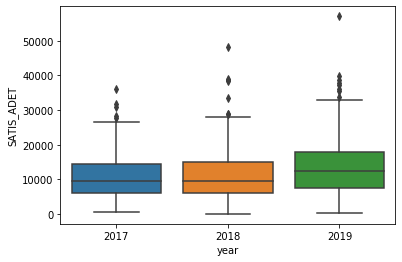

In [23]:
sns.boxplot(x="year", y="SATIS_ADET", data=df_ham)  

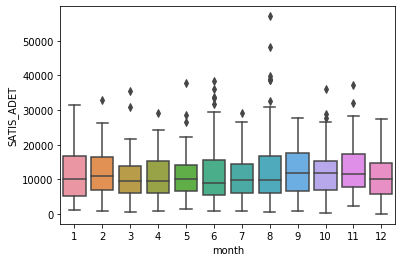

In [24]:
sns.boxplot(x="month", y="SATIS_ADET", data=df_ham)  

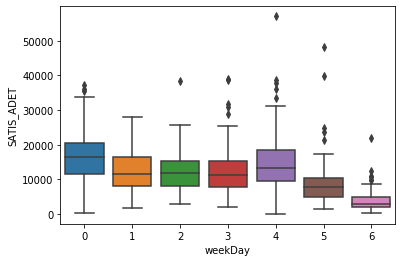

In [25]:
sns.boxplot(x="weekDay", y="SATIS_ADET", data=df_ham)  

## There is a pattern for weekdays. Sunday-6 is the lowest sales day and Monday-0 is the best day.
## 2019 sales are higher than the previous years.
## December sales seems lower than September.

In [ ]:
df_for_prophet = df.copy()

# 2. ARIMA MODELS

## Checking stationarity with adfuller test

In [26]:
from statsmodels.tsa.stattools import adfuller

In [27]:
result = adfuller(df['SATIS_ADET'])

In [28]:
p = result[1]
print('Test Statistics: ',result[0])
print('p-values: ', result[1])
print('Critical Values: ',result[4])
if p>0.05:
  print('Series is not Stationary')
else:
  print("Series is stationary")

Test Statistics:  -8.3252169491321
p-values:  3.4853805894889963e-13
Critical Values:  {'1%': -3.43664125006105, '5%': -2.864317735333004, '10%': -2.5682489786730818}
Series is stationary


In [29]:
df2 = df[["SATIS_ADET"]]

## ACF and PACF Tests

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

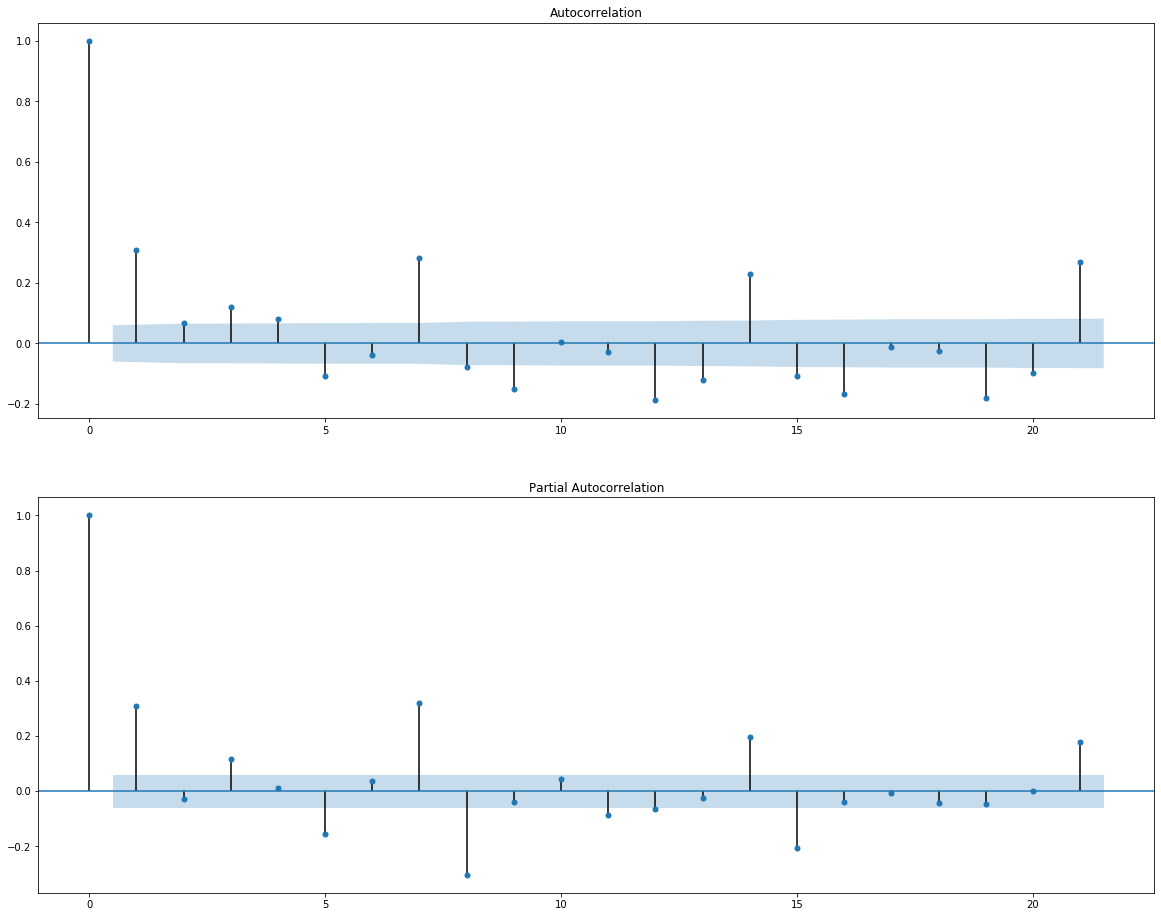

In [31]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,16))
 
# Plot the ACF of df
plot_acf(df2, lags=21, ax=ax1)

# Plot the PACF of df
plot_pacf(df2, lags=21, ax=ax2)

plt.show()

## We see correlations on both with 1 and 5, because of this reason we will choice p and q as 5.
## We can see weekday importance and weekly seasonality in correlations. Lag 7,8, 14,15 and etc. correlated with day 0 because of seasonality.
## We choice p = q = 5

## ARIMA MODEL FITTING

In [32]:
import statsmodels.api as sm

In [33]:
ham_train = df2.iloc[:-30,:]
ham_test = df2.iloc[-30:,:]

In [34]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
talep_model = SARIMAX(ham_train,order=(5,0,5))
arma_results = talep_model.fit()
print(arma_results.summary())

                               SARIMAX Results                                
Dep. Variable:             SATIS_ADET   No. Observations:                 1034
Model:               SARIMAX(5, 0, 5)   Log Likelihood              -10477.380
Date:                Sun, 18 Oct 2020   AIC                          20976.759
Time:                        17:09:04   BIC                          21031.112
Sample:                    01-01-2017   HQIC                         20997.384
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1278      0.111      1.152      0.249      -0.090       0.345
ar.L2          0.2191      0.121      1.816      0.069      -0.017       0.456
ar.L3          0.4647      0.088      5.288      0.0

4590.972581070826


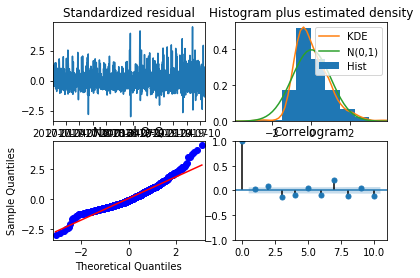

In [35]:
# Calculate the mean absolute error from residuals
mae = np.mean(np.abs(arma_results.resid))

# Print mean absolute error
print(mae)

arma_results.plot_diagnostics()
plt.show()

## We clearly see that on Q-Q plot, we have a problem on forecasting higher sales.
## It shows that our model is weak or our model is good but needs extra features (like seasonality, campaign information, holidays etc.) to explain this variance .

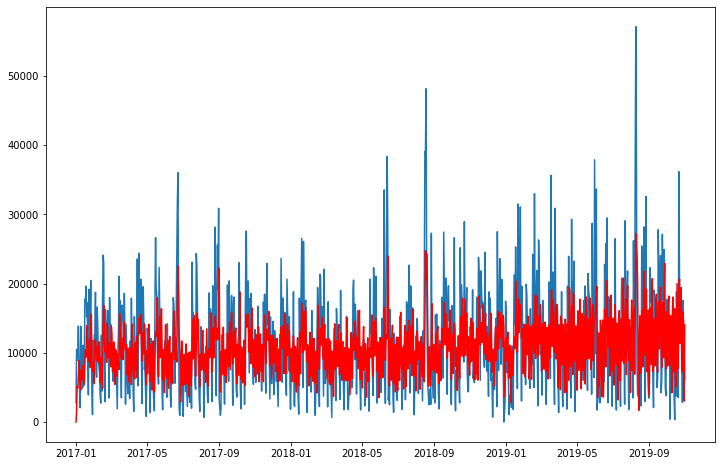

In [66]:
plt.figure(figsize=(12,8))
plt.plot(ham_train)
plt.plot(arma_results.fittedvalues,color="red")
plt.show()

### Comparison on last 60 days of train data

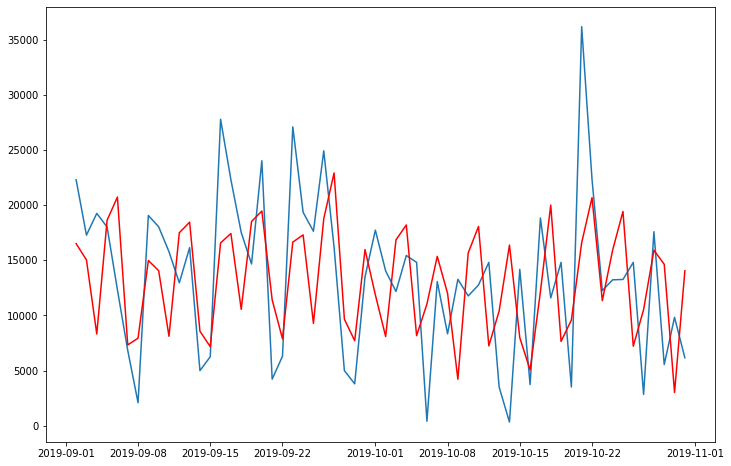

In [67]:
plt.figure(figsize=(12,8))
plt.plot(ham_train[-60:])
plt.plot(arma_results.fittedvalues[-60:],color="red")
plt.show()

## Forecasting and comparing results with real test data

In [37]:
talep_forecast = arma_results.get_forecast(steps=30)

In [38]:
ham_test_pred = talep_forecast.predicted_mean
talep_forecast.predicted_mean

2019-11-01    15848.206804
2019-11-02     8185.598269
2019-11-03     7483.631174
2019-11-04    17381.447466
2019-11-05    14519.402269
2019-11-06     6577.191509
2019-11-07    13130.689164
2019-11-08    18437.184884
2019-11-09     9487.960332
2019-11-10     8337.416577
2019-11-11    17692.146204
2019-11-12    14807.201088
2019-11-13     6634.721803
2019-11-14    13265.866097
2019-11-15    18368.382111
2019-11-16     9577.408628
2019-11-17     8284.077250
2019-11-18    17739.981003
2019-11-19    14720.994450
2019-11-20     6710.991820
2019-11-21    13192.436882
2019-11-22    18398.842795
2019-11-23     9512.640257
2019-11-24     8349.727443
2019-11-25    17654.337344
2019-11-26    14755.715134
2019-11-27     6663.977707
2019-11-28    13236.444765
2019-11-29    18313.151733
2019-11-30     9560.487815
Freq: D, dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(ham_test,ham_test_pred))

7319.312119080313

In [40]:
def find_metrics(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [41]:
find_metrics(ham_test["SATIS_ADET"],ham_test_pred)

MAPE: 51.83 % 
SMAPE: 45.57 %


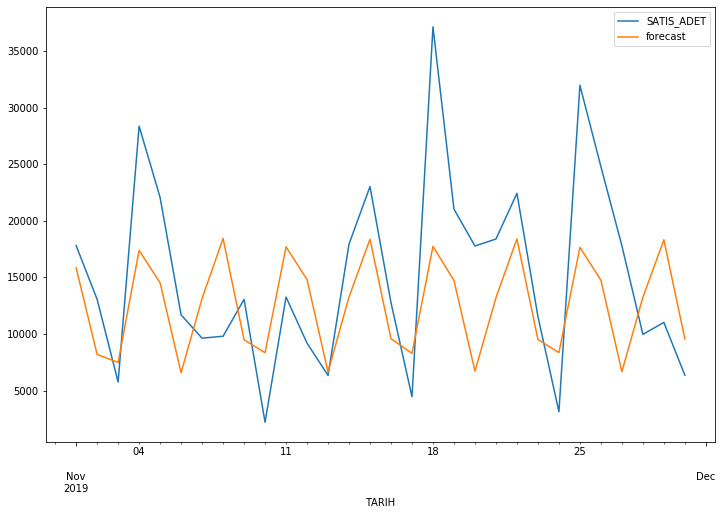

In [68]:
ham_test["forecast"] = ham_test_pred
ham_test.plot(figsize=(12, 8))

## 3. SARIMAX MODELS (WITH SEASONALITY AND EXOGENOUS DATA)

## Decomposition of elements

## To see seasonality better, we just plot last 180 days.

Text(0, 0.5, 'residual error')

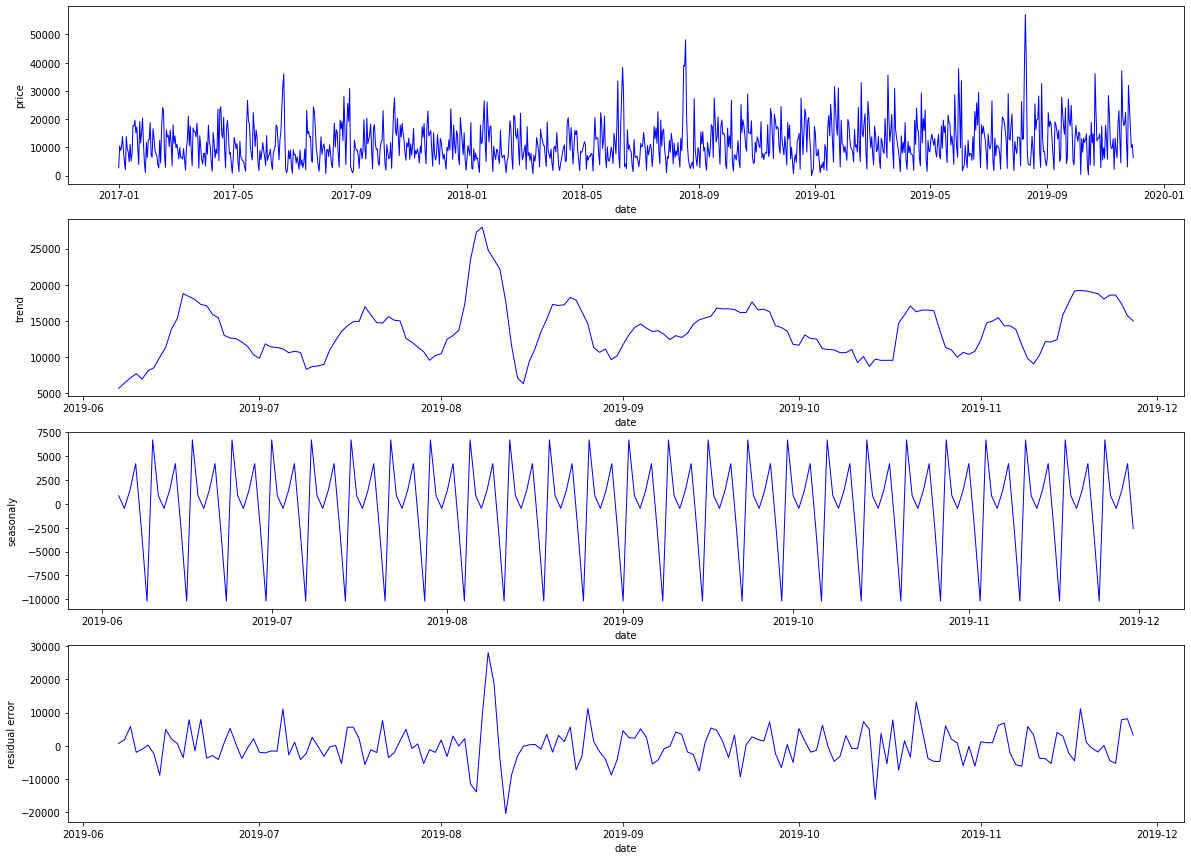

In [43]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(df2[-180:], 
                            freq=7)
data = pd.DataFrame({})
data["date"] = df2.index
data["price"] = df2.values
data.set_index("date", inplace=True)
data["trend"] = decomp.trend
data["seaso"] = decomp.seasonal
data["resid"] = decomp.resid
# Visualization
fig, ax = plt.subplots(4,1, figsize=(20,15))
ax[0].plot(data.index, data["price"], label="price", color="blue", linewidth=1)
ax[0].set_xlabel("date")
ax[0].set_ylabel("price")

ax[1].plot(data.index, data["trend"], label="trend", color="blue", linewidth=1)
ax[1].set_xlabel("date")
ax[1].set_ylabel("trend")

ax[2].plot(data.index, data["seaso"], label="seasonaly", color="blue", linewidth=1)
ax[2].set_xlabel("date")
ax[2].set_ylabel("seasonaly")

ax[3].plot(data.index, data["resid"], label="residual error", color="blue", linewidth=1)
ax[3].set_xlabel("date")
ax[3].set_ylabel("residual error")

In [44]:
df.head()

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year
TARIH                                                       
2017-01-01        6      2784.0             0.0      1  2017
2017-01-02        0     10484.0             0.0      1  2017
2017-01-03        1      8934.0             0.0      1  2017
2017-01-04        2     10185.0             0.0      1  2017
2017-01-05        3     13850.0             0.0      1  2017

## In SARIMAX we can use exogenous data. We can add holiday factor to the model.

In [45]:
import holidays

In [46]:
holidays.TR(years=[2017,2018,2019]).items()

dict_items([(datetime.date(2017, 1, 1), "New Year's Day"), (datetime.date(2017, 4, 23), "National Sovereignty and Children's Day"), (datetime.date(2017, 5, 1), 'Labour Day'), (datetime.date(2017, 5, 19), 'Commemoration of Ataturk, Youth and Sports Day'), (datetime.date(2017, 7, 15), 'Democracy and National Unity Day'), (datetime.date(2017, 8, 30), 'Victory Day'), (datetime.date(2017, 10, 29), 'Republic Day'), (datetime.date(2018, 1, 1), "New Year's Day"), (datetime.date(2018, 4, 23), "National Sovereignty and Children's Day"), (datetime.date(2018, 5, 1), 'Labour Day'), (datetime.date(2018, 5, 19), 'Commemoration of Ataturk, Youth and Sports Day'), (datetime.date(2018, 7, 15), 'Democracy and National Unity Day'), (datetime.date(2018, 8, 30), 'Victory Day'), (datetime.date(2018, 10, 29), 'Republic Day'), (datetime.date(2019, 1, 1), "New Year's Day"), (datetime.date(2019, 4, 23), "National Sovereignty and Children's Day"), (datetime.date(2019, 5, 1), 'Labour Day'), (datetime.date(2019, 5,

In [47]:
tr_holidays = []
for date in holidays.TR(years=[2017,2018,2019]).items():
    tr_holidays.append(str(date[0]))

In [48]:
df["Holiday"] = [1 if str(val).split()[0] in tr_holidays else 0 for val in df.index ]

In [49]:
df.head()

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year  Holiday
TARIH                                                                
2017-01-01        6      2784.0             0.0      1  2017        1
2017-01-02        0     10484.0             0.0      1  2017        0
2017-01-03        1      8934.0             0.0      1  2017        0
2017-01-04        2     10185.0             0.0      1  2017        0
2017-01-05        3     13850.0             0.0      1  2017        0

## In this graph, we see some outlier high sales points.

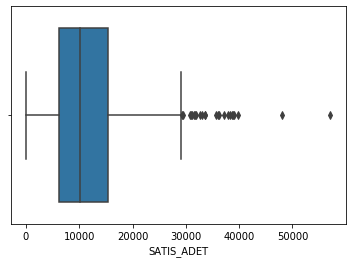

In [50]:
sns.boxplot(df["SATIS_ADET"])

## They are listed below.

In [51]:
print("There are " + str(df[df["SATIS_ADET"]>30000].shape[0]) + " data points in data that have more than 30.000 unit sales ")
df[df["SATIS_ADET"]>30000]

There are 22 data points in data that have more than 30.000 unit sales 


weekDay  SATIS_ADET  STOK_DISI_SURE  month  year  Holiday
TARIH                                                                
2017-06-22        3     31659.0             1.0      6  2017        0
2017-06-23        4     36012.0             0.0      6  2017        0
2017-08-31        3     30861.0             0.0      8  2017        0
2018-06-08        4     33524.0             0.0      6  2018        0
2018-06-13        2     38345.0             0.0      6  2018        0
2018-08-16        3     39069.0             0.0      8  2018        0
2018-08-17        4     38759.0             0.0      8  2018        0
2018-08-18        5     48132.0             0.0      8  2018        0
2019-01-21        0     31488.0             0.0      1  2019        0
2019-01-25        4     31064.0             0.0      1  2019        0
2019-02-18        0     32982.0             0.0      2  2019        0
2019-03-18        0     35627.0             8.0      3  2019        0
2019-03-25        0     30884.0             0.0      3  2019        0
2019-05-31        4     37877.0             0.0      5  2019        0
2019-06-03        0     33648.0             0.0      6  2019        0
2019-08-08        3     38587.0             0.0      8  2019        0
2019-08-09        4     57096.0             0.0      8  2019        0
2019-08-10        5     39774.0             0.0      8  2019        0
2019-08-26        0     32603.0            33.0      8  2019        0
2019-10-21        0     36162.0             0.0     10  2019        0
2019-11-18        0     37130.0             2.0     11  2019        0
2019-11-25        0     31971.0             0.0     11  2019        0

## When we analyze this table, wee see that some highest sales days are just before religious holidays. 
## Since these holidays are not in our holiday list, we should create another list manually.

## 2017, 2018 and 2019 holidays :

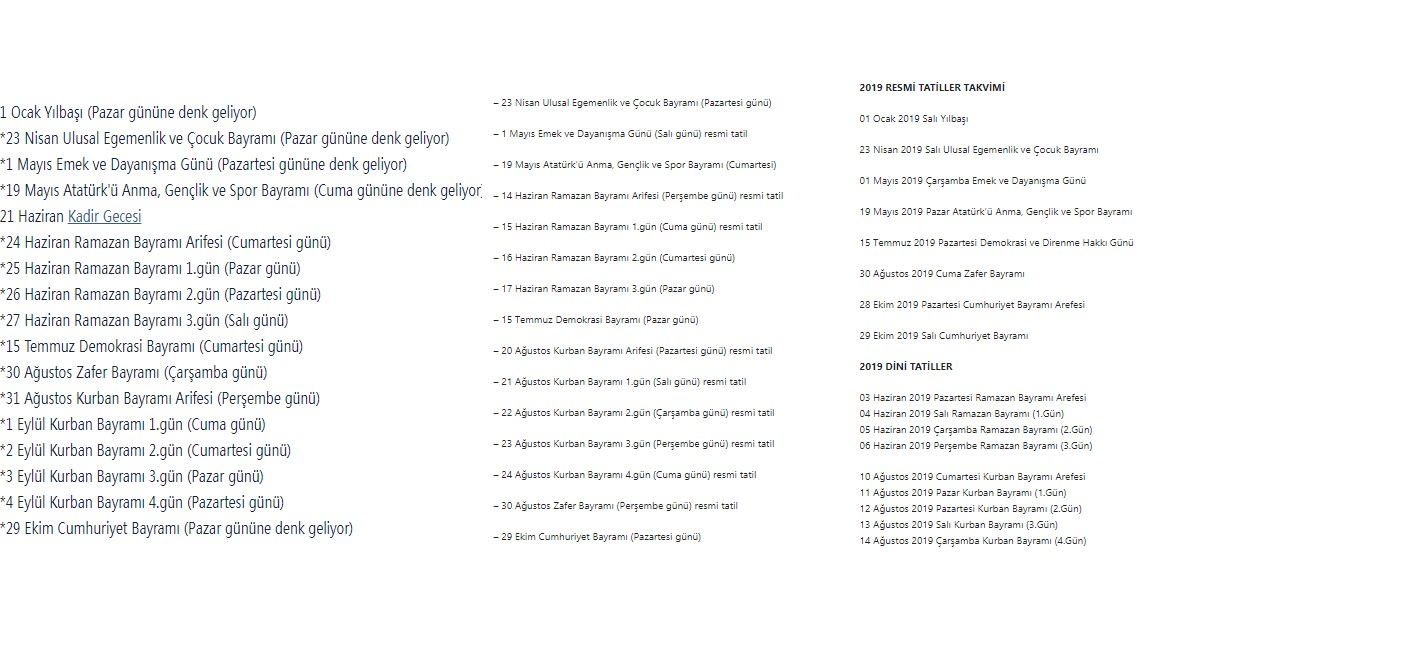

In [52]:
religious_holidays = []

In [53]:
religious_holidays.extend(["2017-06-21","2017-06-22","2017-06-23","2017-06-24","2017-06-25","2017-06-26","2017-06-27",
                  "2017-08-28","2017-08-29","2017-08-30","2017-08-31","2017-09-01","2017-09-02",
                   "2017-09-03","2017-09-04"] )

In [54]:
religious_holidays.extend(["2018-06-11","2018-06-12","2018-06-13","2018-06-14","2018-06-15","2018-06-16","2018-06-17",
                   "2018-08-17", "2018-08-18", "2018-08-19", "2018-08-20", "2018-08-21", "2018-08-22", "2018-08-23",
                  "2018-08-24"])

In [55]:
religious_holidays.extend(["2019-05-31","2019-06-01","2019-06-02","2019-06-03","2019-06-04","2019-06-05","2019-06-06",
                  "2019-08-07", "2019-08-08", "2019-08-09", "2019-08-10", "2019-08-11", "2019-08-12", "2019-08-13", 
                   "2019-08-14"])

In [56]:
df["Religious_Holiday"] = [1 if str(val).split()[0] in religious_holidays else 0 for val in df.index ]
df.head()

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year  Holiday  \
TARIH                                                                   
2017-01-01        6      2784.0             0.0      1  2017        1   
2017-01-02        0     10484.0             0.0      1  2017        0   
2017-01-03        1      8934.0             0.0      1  2017        0   
2017-01-04        2     10185.0             0.0      1  2017        0   
2017-01-05        3     13850.0             0.0      1  2017        0   

            Religious_Holiday  
TARIH                          
2017-01-01                  0  
2017-01-02                  0  
2017-01-03                  0  
2017-01-04                  0  
2017-01-05                  0

## Check the highest sales again.
## Half of the highest days are before-in religious holidays.

In [57]:
df[df["SATIS_ADET"]>30000]

weekDay  SATIS_ADET  STOK_DISI_SURE  month  year  Holiday  \
TARIH                                                                   
2017-06-22        3     31659.0             1.0      6  2017        0   
2017-06-23        4     36012.0             0.0      6  2017        0   
2017-08-31        3     30861.0             0.0      8  2017        0   
2018-06-08        4     33524.0             0.0      6  2018        0   
2018-06-13        2     38345.0             0.0      6  2018        0   
2018-08-16        3     39069.0             0.0      8  2018        0   
2018-08-17        4     38759.0             0.0      8  2018        0   
2018-08-18        5     48132.0             0.0      8  2018        0   
2019-01-21        0     31488.0             0.0      1  2019        0   
2019-01-25        4     31064.0             0.0      1  2019        0   
2019-02-18        0     32982.0             0.0      2  2019        0   
2019-03-18        0     35627.0             8.0      3  2019        0   
2019-03-25        0     30884.0             0.0      3  2019        0   
2019-05-31        4     37877.0             0.0      5  2019        0   
2019-06-03        0     33648.0             0.0      6  2019        0   
2019-08-08        3     38587.0             0.0      8  2019        0   
2019-08-09        4     57096.0             0.0      8  2019        0   
2019-08-10        5     39774.0             0.0      8  2019        0   
2019-08-26        0     32603.0            33.0      8  2019        0   
2019-10-21        0     36162.0             0.0     10  2019        0   
2019-11-18        0     37130.0             2.0     11  2019        0   
2019-11-25        0     31971.0             0.0     11  2019        0   

            Religious_Holiday  
TARIH                          
2017-06-22                  1  
2017-06-23                  1  
2017-08-31                  1  
2018-06-08                  0  
2018-06-13                  1  
2018-08-16                  0  
2018-08-17                  1  
2018-08-18                  1  
2019-01-21                  0  
2019-01-25                  0  
2019-02-18                  0  
2019-03-18                  0  
2019-03-25                  0  
2019-05-31                  1  
2019-06-03                  1  
2019-08-08                  1  
2019-08-09                  1  
2019-08-10                  1  
2019-08-26                  0  
2019-10-21                  0  
2019-11-18                  0  
2019-11-25                  0

## Prepare extra features to the model.
## Categorical features need to be binarized.

In [58]:
df = pd.get_dummies(df, columns = ['month','year','weekDay'] , prefix = ['month','year','weekDay'])
df.columns

Index(['SATIS_ADET', 'STOK_DISI_SURE', 'Holiday', 'Religious_Holiday',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2017', 'year_2018', 'year_2019', 'weekDay_0', 'weekDay_1',
       'weekDay_2', 'weekDay_3', 'weekDay_4', 'weekDay_5', 'weekDay_6'],
      dtype='object')

In [59]:
ext_var_list = ['STOK_DISI_SURE', 'Holiday', 'Religious_Holiday',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'year_2017', 'year_2018', 'year_2019', 'weekDay_0', 'weekDay_1',
       'weekDay_2', 'weekDay_3', 'weekDay_4', 'weekDay_5', 'weekDay_6']

In [60]:
exog_data = df[ext_var_list]
exog_data.head()

STOK_DISI_SURE  Holiday  Religious_Holiday  month_1  month_2  \
TARIH                                                                      
2017-01-01             0.0        1                  0        1        0   
2017-01-02             0.0        0                  0        1        0   
2017-01-03             0.0        0                  0        1        0   
2017-01-04             0.0        0                  0        1        0   
2017-01-05             0.0        0                  0        1        0   

            month_3  month_4  month_5  month_6  month_7    ...      year_2017  \
TARIH                                                      ...                  
2017-01-01        0        0        0        0        0    ...              1   
2017-01-02        0        0        0        0        0    ...              1   
2017-01-03        0        0        0        0        0    ...              1   
2017-01-04        0        0        0        0        0    ...              1   
2017-01-05        0        0        0        0        0    ...              1   

            year_2018  year_2019  weekDay_0  weekDay_1  weekDay_2  weekDay_3  \
TARIH                                                                          
2017-01-01          0          0          0          0          0          0   
2017-01-02          0          0          1          0          0          0   
2017-01-03          0          0          0          1          0          0   
2017-01-04          0          0          0          0          1          0   
2017-01-05          0          0          0          0          0          1   

            weekDay_4  weekDay_5  weekDay_6  
TARIH                                        
2017-01-01          0          0          1  
2017-01-02          0          0          0  
2017-01-03          0          0          0  
2017-01-04          0          0          0  
2017-01-05          0          0          0  

[5 rows x 25 columns]

In [61]:
print(exog_data.shape[0])
print(df.shape[0])

1064
1064


## We have best lag parameters for ARIMA (5,0,5)
## Lets try seasonal lag parameters with GridSearchCV

In [62]:
import itertools
p = q = range(0, 6)
d = range(0,2)
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {}'.format( seasonal_pdq[1]))
print('SARIMAX: {}'.format( seasonal_pdq[2]))
print('SARIMAX: {}'.format( seasonal_pdq[3]))
print('SARIMAX: {}'.format( seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1, 7)
SARIMAX: (0, 0, 2, 7)
SARIMAX: (0, 0, 3, 7)
SARIMAX: (0, 0, 4, 7)


In [69]:
order_aic_bic = []
cnt = 0

for param_seasonal in seasonal_pdq:
    try:
        mod = sm.tsa.statespace.SARIMAX(endog = df.SATIS_ADET[:-30],
                                        exog = exog_data[:-30],  
                                            order=(5,0,5),
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
        results = mod.fit()
        cnt += 1
    
        print('Current Iter - {}, ARIMA(5,0,5){} 7 - AIC:{}'.format(cnt, param_seasonal, results.aic))
    except:
        continue

Current Iter - 1, ARIMA(5,0,5)(0, 0, 0, 7) 7 - AIC:20508.15048781583
Current Iter - 2, ARIMA(5,0,5)(0, 0, 1, 7) 7 - AIC:20374.512732479354
Current Iter - 3, ARIMA(5,0,5)(0, 0, 2, 7) 7 - AIC:20236.661522095645
Current Iter - 4, ARIMA(5,0,5)(0, 0, 3, 7) 7 - AIC:20105.959537206523
Current Iter - 5, ARIMA(5,0,5)(0, 0, 4, 7) 7 - AIC:19959.138810615346
Current Iter - 6, ARIMA(5,0,5)(0, 0, 5, 7) 7 - AIC:19821.093427608714
Current Iter - 7, ARIMA(5,0,5)(0, 1, 0, 7) 7 - AIC:20844.711900582945
Current Iter - 8, ARIMA(5,0,5)(0, 1, 1, 7) 7 - AIC:20497.577406805118
Current Iter - 9, ARIMA(5,0,5)(0, 1, 2, 7) 7 - AIC:20359.01675281854
Current Iter - 10, ARIMA(5,0,5)(0, 1, 3, 7) 7 - AIC:20214.197617452875
Current Iter - 11, ARIMA(5,0,5)(0, 1, 4, 7) 7 - AIC:20078.031615857784
Current Iter - 12, ARIMA(5,0,5)(0, 1, 5, 7) 7 - AIC:19925.17083790904
Current Iter - 13, ARIMA(5,0,5)(1, 0, 0, 7) 7 - AIC:20393.525023737362
Current Iter - 14, ARIMA(5,0,5)(1, 0, 1, 7) 7 - AIC:20372.690370185454
Current Iter - 15,

## Best seasonal parameters p,d,q = (5,0,5) according to argMin(AIC)

In [81]:
sarimax_model = sm.tsa.statespace.SARIMAX(endog = df.SATIS_ADET[:-30],
                                        exog = exog_data[:-30],  
                                         order=(5,0,5), seasonal_order=(5,0,5,7)).fit()
print(sarimax_model.summary())

                                     SARIMAX Results                                     
Dep. Variable:                        SATIS_ADET   No. Observations:                 1034
Model:             SARIMAX(5, 0, 5)x(5, 0, 5, 7)   Log Likelihood              -10236.990
Date:                           Sun, 18 Oct 2020   AIC                          20565.979
Time:                                   21:39:25   BIC                          20793.274
Sample:                               01-01-2017   HQIC                         20652.227
                                    - 10-31-2019                                         
Covariance Type:                             opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
STOK_DISI_SURE       -4.4756      3.363     -1.331      0.183     -11.067       2.115
Holiday           -328

In [82]:
start_index = '2019-11-01'
end_index = '2019-11-30'
end_index1 = '2019-11-30'

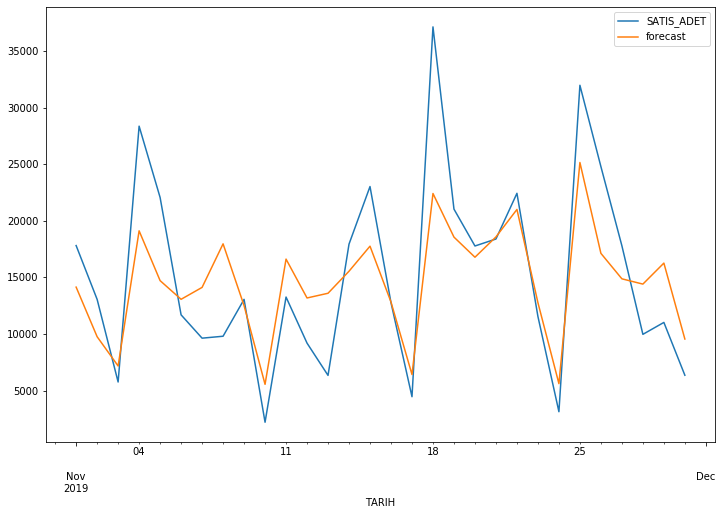

In [83]:
df['forecast'] = sarimax_model.predict(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                            exog = exog_data[start_index:end_index], 
                                            dynamic= False)  
df['forecast_low'] = sarimax_model.get_prediction(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                            exog = exog_data[start_index:end_index],dynamic= False).conf_int(alpha=0.80)["lower SATIS_ADET"]
df['forecast_high'] = sarimax_model.get_prediction(start = pd.to_datetime(start_index), end= pd.to_datetime(end_index1),
                                            exog = exog_data[start_index:end_index],dynamic= False).conf_int(alpha=0.80)["upper SATIS_ADET"]
df[start_index:end_index][['SATIS_ADET','forecast']].plot(figsize=(12, 8))

## Plotting the confidence interval with +-10% confidence interval around predicted mean.

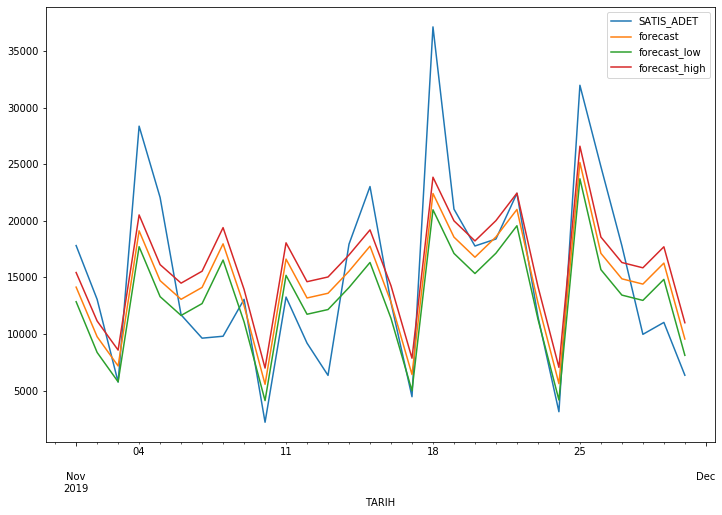

In [84]:
df[start_index:end_index][["SATIS_ADET","forecast","forecast_low","forecast_high"]].plot(figsize=(12, 8))

## MAPE is decreased from 50% to 35%

In [86]:
find_metrics(df[start_index:end_index]['SATIS_ADET'],df[start_index:end_index]['forecast'])

MAPE: 35.46 % 
SMAPE: 29.81 %


## Mean Squared Error is decreased from 7314 to 5125.

In [87]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(df[start_index:end_index]['SATIS_ADET'],df[start_index:end_index]['forecast']))

5125.07116588991

## Compare the SARIMAX plot with ARIMA plot
## SARIMAX captures higher sales better.

## ARIMAX Plot

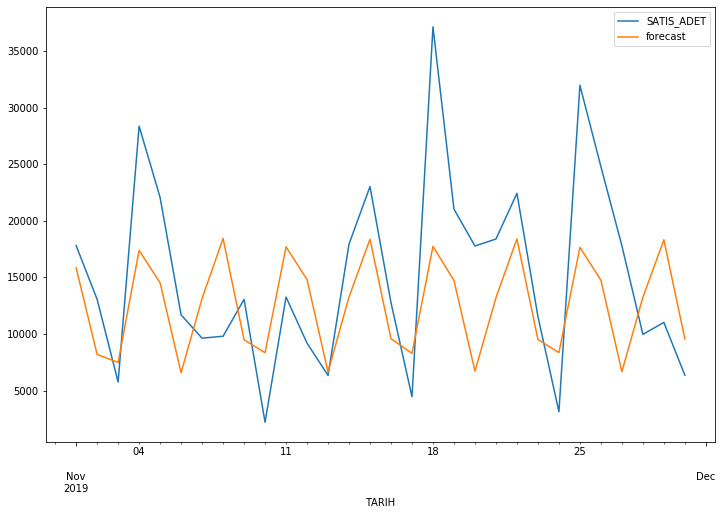

In [88]:
ham_test.plot(figsize=(12, 8))

# 4. Forecasting December Sales

In [281]:
exog_data.columns

Index(['STOK_DISI_SURE', 'Holiday', 'Religious_Holiday', 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2017', 'year_2018',
       'year_2019', 'weekDay_0', 'weekDay_1', 'weekDay_2', 'weekDay_3',
       'weekDay_4', 'weekDay_5', 'weekDay_6'],
      dtype='object')

In [282]:
df_test = pd.DataFrame()

In [283]:
exog_data_test = pd.DataFrame()

In [284]:
exog_data_test['datetime'] = pd.date_range(start='12-01-2019', periods=31, freq="d")
df_test['datetime'] = pd.date_range(start='12-01-2019', periods=31, freq="d")

In [285]:
exog_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
datetime    31 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 328.0 bytes


In [286]:
exog_data_test = exog_data_test.set_index('datetime')
df_test = df_test.set_index('datetime')
exog_data_test.head()

Empty DataFrame
Columns: []
Index: [2019-12-01 00:00:00, 2019-12-02 00:00:00, 2019-12-03 00:00:00, 2019-12-04 00:00:00, 2019-12-05 00:00:00]

In [287]:
exog_data_test["weekDay"] = exog_data_test.index.dayofweek
exog_data_test["month"] = exog_data_test.index.month
exog_data_test["year"] = exog_data_test.index.year
exog_data_test['Holiday'] = 0
exog_data_test['Religious_Holiday'] = 0

In [288]:
exog_data_test.head()

weekDay  month  year  Holiday  Religious_Holiday
datetime                                                    
2019-12-01        6     12  2019        0                  0
2019-12-02        0     12  2019        0                  0
2019-12-03        1     12  2019        0                  0
2019-12-04        2     12  2019        0                  0
2019-12-05        3     12  2019        0                  0

In [289]:
len(df.STOK_DISI_SURE.values)

1064

## We will create a list for "stock-out min" by bootstrapping from df "stock-out" values randomly.
## We will use it in our test sample to make predictions.

In [290]:
import random
df_stok_dısı = df.STOK_DISI_SURE.values
stok_dısı_sure_test = []
for i in range(0,31):
    sample = random.choice(df_stok_dısı)
    stok_dısı_sure_test.append(sample)
    i += 1

In [291]:
exog_data_test["STOK_DISI_SURE"] = stok_dısı_sure_test
exog_data_test.head()

weekDay  month  year  Holiday  Religious_Holiday  STOK_DISI_SURE
datetime                                                                    
2019-12-01        6     12  2019        0                  0             0.0
2019-12-02        0     12  2019        0                  0             0.0
2019-12-03        1     12  2019        0                  0             0.0
2019-12-04        2     12  2019        0                  0             0.0
2019-12-05        3     12  2019        0                  0             0.0

In [292]:
new_columns = [ 'month_1', 'month_2',
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12', 'year_2017', 'year_2018',
       'year_2019', 'weekDay_0', 'weekDay_1', 'weekDay_2', 'weekDay_3',
       'weekDay_4', 'weekDay_5', 'weekDay_6']

In [293]:
for col in new_columns:
    exog_data_test[col] = 0

In [294]:
exog_data_test.head(3)

weekDay  month  year  Holiday  Religious_Holiday  STOK_DISI_SURE  \
datetime                                                                       
2019-12-01        6     12  2019        0                  0             0.0   
2019-12-02        0     12  2019        0                  0             0.0   
2019-12-03        1     12  2019        0                  0             0.0   

            month_1  month_2  month_3  month_4    ...      year_2017  \
datetime                                          ...                  
2019-12-01        0        0        0        0    ...              0   
2019-12-02        0        0        0        0    ...              0   
2019-12-03        0        0        0        0    ...              0   

            year_2018  year_2019  weekDay_0  weekDay_1  weekDay_2  weekDay_3  \
datetime                                                                       
2019-12-01          0          0          0          0          0          0   
2019-12-02          0          0          0          0          0          0   
2019-12-03          0          0          0          0          0          0   

            weekDay_4  weekDay_5  weekDay_6  
datetime                                     
2019-12-01          0          0          0  
2019-12-02          0          0          0  
2019-12-03          0          0          0  

[3 rows x 28 columns]

In [295]:
def weekdayCreate(df):
    i = df["weekDay"]
    for k in range(0,7):
        column = "weekDay_" + str(k)
        if df[column] == i:
            df[column] = 1
        else:
            df[column] = 0

In [296]:
exog_data_test['weekDay_0'] = exog_data_test['weekDay_0'].apply(lambda x: 10 if x == 'Value' else x)

In [297]:
for i in range(0,7):
    exog_data_test.loc[exog_data_test['weekDay'] == i, 'weekDay_'+str(i)] = 1

In [298]:
exog_data_test['month_12'] = 1
exog_data_test['year_2019'] = 1

In [299]:
exog_data_test.head(3)

weekDay  month  year  Holiday  Religious_Holiday  STOK_DISI_SURE  \
datetime                                                                       
2019-12-01        6     12  2019        0                  0             0.0   
2019-12-02        0     12  2019        0                  0             0.0   
2019-12-03        1     12  2019        0                  0             0.0   

            month_1  month_2  month_3  month_4    ...      year_2017  \
datetime                                          ...                  
2019-12-01        0        0        0        0    ...              0   
2019-12-02        0        0        0        0    ...              0   
2019-12-03        0        0        0        0    ...              0   

            year_2018  year_2019  weekDay_0  weekDay_1  weekDay_2  weekDay_3  \
datetime                                                                       
2019-12-01          0          1          0          0          0          0   
2019-12-02          0          1          1          0          0          0   
2019-12-03          0          1          0          1          0          0   

            weekDay_4  weekDay_5  weekDay_6  
datetime                                     
2019-12-01          0          0          1  
2019-12-02          0          0          0  
2019-12-03          0          0          0  

[3 rows x 28 columns]

In [300]:
exog_data_test = exog_data_test.drop(['weekDay', 'month', 'year'], axis=1)
exog_data_test.head(3)

Holiday  Religious_Holiday  STOK_DISI_SURE  month_1  month_2  \
datetime                                                                   
2019-12-01        0                  0             0.0        0        0   
2019-12-02        0                  0             0.0        0        0   
2019-12-03        0                  0             0.0        0        0   

            month_3  month_4  month_5  month_6  month_7    ...      year_2017  \
datetime                                                   ...                  
2019-12-01        0        0        0        0        0    ...              0   
2019-12-02        0        0        0        0        0    ...              0   
2019-12-03        0        0        0        0        0    ...              0   

            year_2018  year_2019  weekDay_0  weekDay_1  weekDay_2  weekDay_3  \
datetime                                                                       
2019-12-01          0          1          0          0          0          0   
2019-12-02          0          1          1          0          0          0   
2019-12-03          0          1          0          1          0          0   

            weekDay_4  weekDay_5  weekDay_6  
datetime                                     
2019-12-01          0          0          1  
2019-12-02          0          0          0  
2019-12-03          0          0          0  

[3 rows x 25 columns]

In [301]:
exog_data_test.shape

(31, 25)

## Data is ready to forecasting.

In [302]:
start_index_test = '2019-12-01'
end_index_test = '2019-12-31'
end_index1_test = '2020-01-01'

## Fıt the model again , this time with full data
## Assume that stock out rates are 0 in test data

In [318]:
exog_data_test["STOK_DISI_SURE"] = 0

In [319]:
sarimax_model = sm.tsa.statespace.SARIMAX(endog = df.SATIS_ADET,
                                        exog = exog_data,  
                                         order=(5,0,5), seasonal_order=(5,0,5,7)).fit()

In [378]:
df_test["forecast"] = sarimax_model.predict(start = pd.to_datetime(start_index_test), end= pd.to_datetime(end_index_test),
                                            exog = exog_data_test, 
                                            dynamic= False)

In [379]:
df_test["forecast"] = df_test["forecast"].astype(int)

In [380]:
df_test.head(31)

forecast
datetime            
2019-12-01      3015
2019-12-02     17953
2019-12-03     12586
2019-12-04     10479
2019-12-05     11141
2019-12-06     15160
2019-12-07      9707
2019-12-08      3831
2019-12-09     17077
2019-12-10     12371
2019-12-11     11594
2019-12-12     13170
2019-12-13     15781
2019-12-14     11669
2019-12-15      4761
2019-12-16     19426
2019-12-17     15975
2019-12-18     14561
2019-12-19     17282
2019-12-20     20243
2019-12-21     12400
2019-12-22      4945
2019-12-23     27415
2019-12-24     18849
2019-12-25     15753
2019-12-26     15516
2019-12-27     17424
2019-12-28      9970
2019-12-29      4120
2019-12-30     19545
2019-12-31     13779

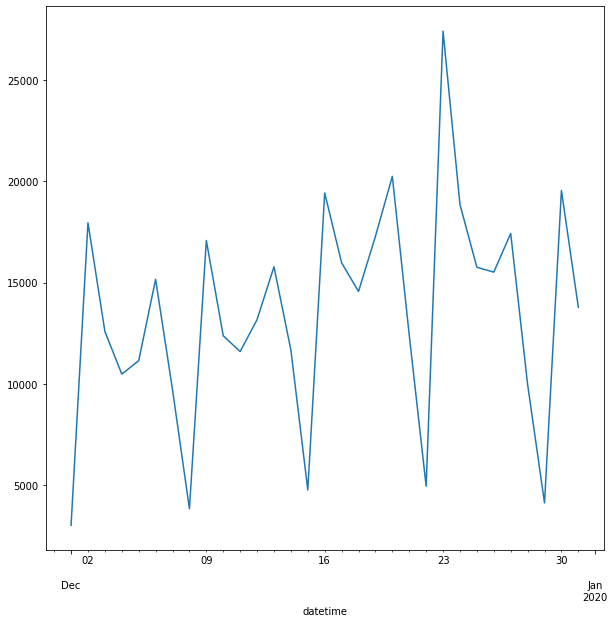

In [381]:
df_test["forecast"].plot(figsize=(10,10))

In [382]:
df_test = df_test.reset_index()

In [383]:
df_test.head()

datetime  forecast
0 2019-12-01      3015
1 2019-12-02     17953
2 2019-12-03     12586
3 2019-12-04     10479
4 2019-12-05     11141

In [384]:
df_test.to_csv("talep_tahmin_sonuclar.csv")

ImportError: cannot import name 'get_compression_method' from 'pandas.io.common' (C:\Users\TCSDESTICIOGLU\AppData\Local\Continuum\anaconda4\lib\site-packages\pandas\io\common.py)